<a href="https://colab.research.google.com/github/DS3001/group9/blob/main/midterm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/DS3001/group9

Cloning into 'group9'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 74 (delta 35), reused 9 (delta 1), pack-reused 3
Receiving objects: 100% (74/74), 100.95 MiB | 25.13 MiB/s, done.
Resolving deltas: 100% (35/35), done.


# Import dependencies and load data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import zipfile # for reading csv as zip

In [6]:
# zip file in git repo
zip_path = "./group9/gss.csv.zip"

# Desired csv file in zip
file_to_read = "gss.csv"

with zipfile.ZipFile(zip_path, 'r') as zip_file:

  var_list = ['racseg', 'pres80', 'degree', 'age', 'race', 'sex', 'rincom82', 'rincom86', 'pres84'] # List of variables to save
  output_file = 'raw_gss_data.csv' # Name of the file to save the data to

  parser = pd.read_csv(zip_file.open(file_to_read), iterator=True, chunksize=10000, low_memory=False) # Creates a parser for the whole data
  modes = ['w','a'] # Has write mode and append mode
  phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode

  for chunk in parser: # For each chunk of the data
      print(chunk.loc[:,var_list].head()) # Visually inspect the first few rows
      chunk.loc[:,var_list].to_csv(output_file, # specifies target file to save the chunk to
                                  mode=modes[phase], # control write versus append
                                  header=var_list, # variable names
                                  index=False) # no row index saved
      phase = 1 # Switch from write mode to append mode




KeyboardInterrupt: ignored

In [63]:
# Create dataframe from 'raw_gss_data.csv' that was just written
gss_dat = pd.read_csv("raw_gss_data.csv") # '80 election
gss_dat84 = pd.read_csv("raw_gss_data.csv") # '84 election


# Data cleaning and preprocessing ('80 election)

In [64]:
gss_dat['pres80'].unique()

array([nan, 'pres80', 'reagan', 'carter', 'anderson', 'refused_(5)',
       'other', 'didnt vote'], dtype=object)

In [65]:
#print(gss_dat['pres80'].value_counts())

# Remove "didn't vote for president" and other no answer responses (see codebook), also deleted Anderson as we want binary prediction variable
gss_dat = gss_dat.loc[
    (gss_dat['pres80'] == 'reagan') |
    (gss_dat['pres80'] == 'carter'), :]

# Every entry either voted for Trump, Clinton, or other unspecified candidate
print(gss_dat['pres80'].value_counts())
print(gss_dat['pres80'].isnull().sum())


# data is now filtered for years 82-87, as observations for pres80 are only in this range

carter    2635
reagan    2218
Name: pres80, dtype: int64
0


([0, 1, 2, 3, 4],
 [Text(0, 0, 'less than high school'),
  Text(1, 0, 'high school'),
  Text(2, 0, 'associate/junior college'),
  Text(3, 0, "bachelor's"),
  Text(4, 0, 'graduate')])

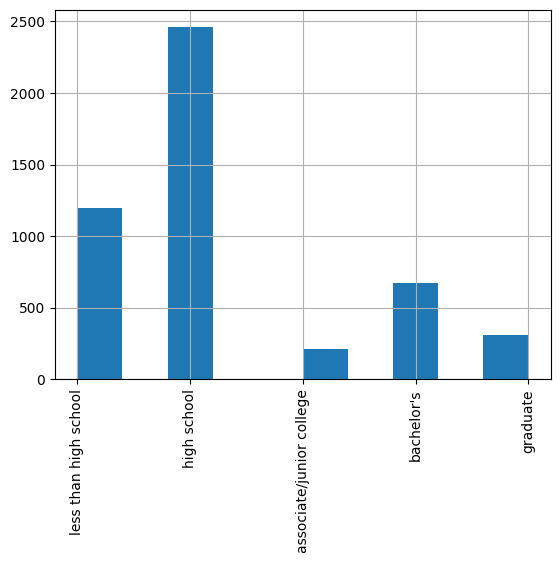

In [66]:
gss_dat['degree'].isnull().sum()
gss_dat['degree'].value_counts()
gss_dat['degree'].unique() # NaN and 'degree' present

gss_dat = gss_dat.loc[(~gss_dat['degree'].isnull()) & (gss_dat['degree'] != 'degree'), ] # keep rows where value for degree is not NaN or 'degree' (see codebook, NaN and 'degree' respones are invalid)
gss_dat['degree'].unique() # all observations are now "bachelor's", 'less than high school', 'high school', 'graduate', or 'associate/junior college'

gss_dat['degree'].hist()
plt.xticks(rotation=90)

In [67]:
# rincom82
# because of the distribution of this histogram, I think it is ok to take the mean of each range as its numeric value
## $50,000 + is ok as 50000 as it is not a huge proportion of the data
#gss_dat['rincom82'].hist()
gss_dat['rincom82'].unique()

gss_dat['rincom82'].value_counts()
# recode all values to numeric mean of range
temp = gss_dat['rincom82'].replace('lt $1000', 1000).replace('$1000-2999', 2000).replace('$3000-3999', 3500).replace('$4000-4999', 4500).replace('$5000-5999', 5500).replace('$6000-6999', 6500).replace('$7000-7999', 7500).replace('$8000-9999', 9000).replace('$10000-12499', 11250).replace('$12500-14999', 13750).replace('$15000-17499', 16250).replace('$17500-19999', 18750).replace('$20000-22499', 21250).replace('$22500-24999', 23750).replace('$25000-34999', 30000).replace('$35000-49999', 42500).replace('$50000 +', 50000)
temp.value_counts()
gss_dat['rincom82'] = temp



# rincom86
gss_dat['rincom86'].value_counts()
# recode all values to numeric mean of range
temp = gss_dat['rincom86'].replace('lt $1000', 1000).replace('$1000-2999', 2000).replace('$3000-3999', 3500).replace('$4000-4999', 4500).replace('$5000-5999', 5500).replace('$6000-6999', 6500).replace('$7000-7999', 7500).replace('$8000-9999', 9000).replace('$10000-12499', 11250).replace('$12500-14999', 13750).replace('$15000-17499', 16250).replace('$17500-19999', 18750).replace('$20000-22499', 21250).replace('$22500-24999', 23750).replace('$25000-29999', 27500).replace('$30000-34999', 32500).replace('$35000-39999', 37500).replace('$40000-49999', 45000).replace('$50000-59999', 55000).replace('$60000+', 60000)
temp.value_counts()
gss_dat['rincom86'] = temp

gss_dat = gss_dat.loc[(~gss_dat['rincom82'].isnull()) |
                      (~gss_dat['rincom86'].isnull()), ] # dropped all rows where rincom82 is a NaN or rincom86 is a NaN


print(gss_dat['rincom82'].unique())
print(gss_dat['rincom86'].unique())

# Combine data
gss_dat['income'] = gss_dat['rincom82'].fillna(gss_dat['rincom86']) # make a combined column 'income' that is equal to rincom82 unless it is NaN, then equal to rincom86




[18750. 16250. 11250.  2000. 30000.  1000.  6500.  4500.  3500. 21250.
 23750.  7500. 13750.  5500. 50000.  9000. 42500.    nan]
[   nan 60000. 11250. 27500. 21250. 23750. 32500.  7500.  5500.  3500.
  1000. 55000.  4500. 37500. 13750. 16250.  2000.  9000. 18750. 45000.
  6500.]


<ipython-input-67-430a7039cede>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_dat['income'] = gss_dat['rincom82'].fillna(gss_dat['rincom86']) # make a combined column 'income' that is equal to rincom82 unless it is NaN, then equal to rincom86




**Data preprocessing for kNN**

In [68]:
# Coerce age to numeric
print(gss_dat['age'].value_counts())
gss_dat['age'].isnull().sum()
gss_dat = gss_dat.loc[~gss_dat['age'].isnull(), ] # keep rows where age is NOT null
gss_dat['age'].isnull().sum()

gss_dat['age'] = pd.to_numeric(gss_dat['age'], errors="coerce")

35.0    100
37.0     97
34.0     94
30.0     90
28.0     88
       ... 
20.0      2
81.0      2
80.0      2
79.0      1
84.0      1
Name: age, Length: 65, dtype: int64


<ipython-input-68-865c78a7949a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_dat['age'] = pd.to_numeric(gss_dat['age'], errors="coerce")


In [69]:
gss_dat['degree'] = gss_dat['degree'].replace('less than high school', 0).replace('high school', 1).replace('associate/junior college', 2).replace("bachelor's", 3).replace('graduate', 4)
# 0 = Less than hs
# 1 = hs
# 2 = associate/junior college
# 3 = bachelors
# 4 = graduate


<ipython-input-69-ba6548381d05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_dat['degree'] = gss_dat['degree'].replace('less than high school', 0).replace('high school', 1).replace('associate/junior college', 2).replace("bachelor's", 3).replace('graduate', 4)


In [70]:
gss_dat['pres80'] = gss_dat['pres80'].replace('reagan', 1).replace('carter', 0)

<ipython-input-70-03368a6bb44b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_dat['pres80'] = gss_dat['pres80'].replace('reagan', 1).replace('carter', 0)


In [71]:
gss_dat['sex'] = gss_dat['sex'].replace('female', 0).replace('male', 1)

<ipython-input-71-67f8a4ca2ab7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_dat['sex'] = gss_dat['sex'].replace('female', 0).replace('male', 1)


# Modeling ('80 election)

In [72]:
# Function to max-min normalize data so each variables ranges from 0-1
def maxmin(x):
  res = (x-min(x))/(max(x)-min(x))
  return res

In [73]:
print(min(gss_dat['age'].unique()))
print(max(gss_dat['age'].unique()))

from sklearn.model_selection import train_test_split

# Maxmin normalize data and split into training/testing sets
X = gss_dat[['income', 'age']]
y = gss_dat['pres80']


X = X.apply(maxmin)
print(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=74)
print("X_train data:", X_train.shape)
print("X_test data:", X_test.shape)
print("y_train data:", y_train.shape)
print("y_test data:", y_test.shape)

print(X_train.columns)
print(X_test.columns)

20.0
84.0
         income       age
12121  0.300847  0.328125
12129  0.258475  0.531250
12132  0.173729  0.156250
12133  0.016949  0.515625
12134  0.300847  0.296875
X_train data: (2424, 2)
X_test data: (607, 2)
y_train data: (2424,)
y_test data: (607,)
Index(['income', 'age'], dtype='object')
Index(['income', 'age'], dtype='object')


In [74]:
# Fit model
from sklearn.neighbors import KNeighborsRegressor as kNNRegressor

knn_model = kNNRegressor(n_neighbors=63)
fitted_model = knn_model.fit(X_train, y_train)


In [75]:
# Run regression model
# Regression function to predict pres vote based on 'age' and 'income'
def plot_regression(X_train, y_train, num_colors):

  N_x = 100
  N_y = 100 # Coarseness of y variable
  total = N_x*N_y # Total number of points to plot

  grid_x = np.linspace(0,1,N_x) # Create a grid of x values
  grid_y = np.linspace(0,1,N_y) # Create a grid of y values

  xs, ys = np.meshgrid(grid_x,grid_y) # Explode grids to all possible pairs
  X = xs.reshape(total) # Turns pairs into vectors
  Y = ys.reshape(total) # Turns pairs into vectors

  x_hat = pd.DataFrame({'income':X,'age':Y}) # Create a dataframe of points to plot
  y_hat = fitted_model.predict(x_hat) # Fit the model to the points
  x_hat['Predicted'] = y_hat # Add new variable to the dataframe

  # Red to blue palette to show traditional political colors
  red_to_blue_palette = sns.color_palette("RdBu_r", n_colors=num_colors) # n_colors determined by k

  this_plot = sns.scatterplot(data=x_hat,x='age',y='income',hue='Predicted', palette= red_to_blue_palette) # Create seaborn plot

  # Round legend values to 2 decimal
  legend = plt.legend() # stackoverflow.com
  for text in legend.get_texts():
    original_label = text.get_text()
    rounded_label = str(round(float(original_label), 2))
    text.set_text(rounded_label)

  sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas
  plt.title("Distribution of voters for Reagan and Carter ('80) based on Income and Age")
  plt.ylabel('Income')
  plt.xlabel('Age')

  plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [20, 33, 46, 59, 72, 85])

  ### to-do ###
  # convert axis ticks back to original data for understandability

  return x_hat

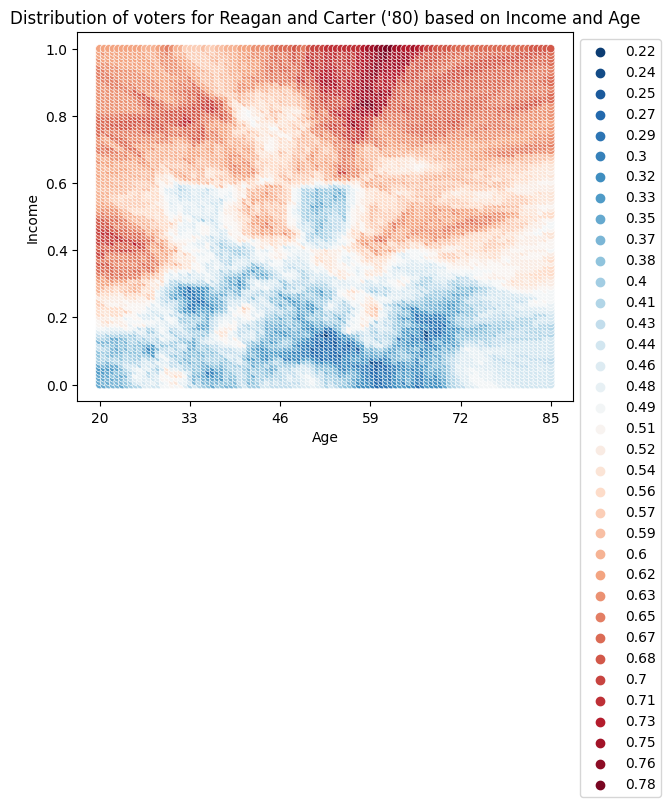

In [76]:
train_dat = plot_regression(X_train, y_train, 36)

## NOTE: the range of values for prediction gives some insight. The lowest and highest predictions are .22 away from the definitive 0 or 1. The darkest red is ~80% likely to have voted for Reagan.

In [77]:
# Determine k value
# Determine optimal k val for this data

k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print("K where SSE is minimized:", k_star)
print("SSE at " + str(k_star) + ':', SSE_min)

K where SSE is minimized: [63]
SSE at [63]: 146.60367850844042


Text(0, 0.5, 'SSE')

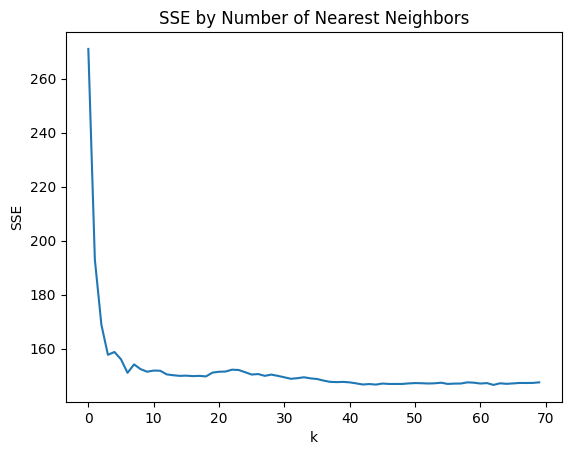

In [78]:
plt.title("SSE by Number of Nearest Neighbors")
plt.plot(np.arange(0,k_bar),SSE_test,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")

These regression models provide some insight, but its accuracy is very limited. What if we further subdivide by ____ and try regression again

# Modeling by 'racseg' ('80 election)

In [79]:
# Clean data to only incorporate observations with 'racseg' values'
gss_dat = gss_dat.loc[~gss_dat['racseg'].isnull()]
gss_dat['racseg'].unique()

# combine variations of same answer into agree and disagree (1-0)
gss_dat['racseg'] = gss_dat['racseg'].replace("agree slightly", 1).replace("agree strongly", 1).replace("disagree slightly", 0).replace("disagree strongly", 0)

agree_dat = gss_dat.loc[gss_dat['racseg'] == 1]
disagree_dat = gss_dat.loc[gss_dat['racseg'] == 0]

# each dataframe contains either only agree or disagree data
print(agree_dat['racseg'].unique())
print(disagree_dat['racseg'].unique())

[1]
[0]


<ipython-input-79-9ea00ea25168>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_dat['racseg'] = gss_dat['racseg'].replace("agree slightly", 1).replace("agree strongly", 1).replace("disagree slightly", 0).replace("disagree strongly", 0)


In [81]:
pd.crosstab(gss_dat['racseg'], gss_dat['pres80'])

pres80,0,1
racseg,,
0,1099,843
1,228,236


<Axes: xlabel='age', ylabel='income'>

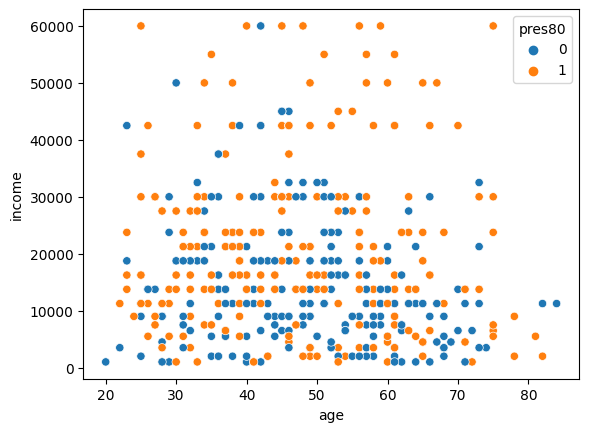

In [25]:
# those who AGREE that "whites have a right to a segregated neighborhood"
sns.scatterplot(data=agree_dat, x='age', y='income', hue='pres80')

<Axes: xlabel='age', ylabel='income'>

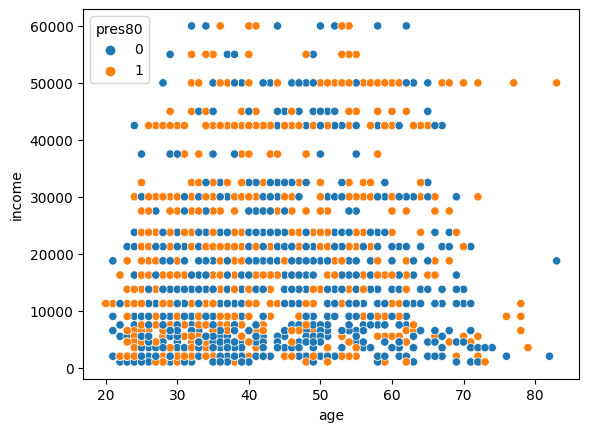

In [26]:
# those who DISAGREE that "whites have a right to a segregated neighborhood"
sns.scatterplot(data=disagree_dat, x='age', y='income', hue='pres80')

It is clear with these scatterplots that there is a different distribution of voting patterns based on age and income when observations are sub-divided by 'racseg'. Let's run kNN regression for election; once for those who agree, once for those who disagree, and we will see if our regression models become any clearer

<Axes: xlabel='temp_age', ylabel='temp_income'>

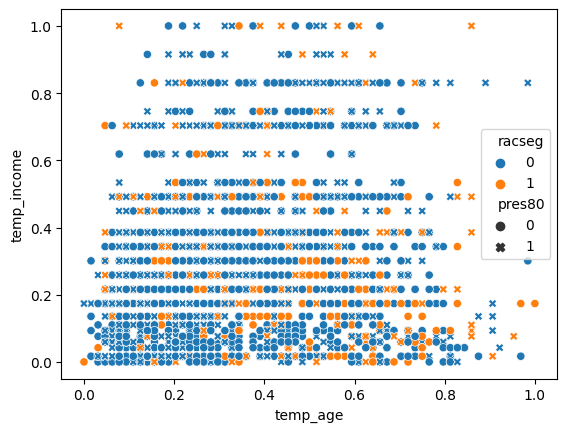

In [27]:
temp = gss_dat[['age']]
temp_age = temp.apply(maxmin)
temp = gss_dat[['income']]
temp_income = temp.apply(maxmin)

gss_dat['temp_age'] = temp_age
gss_dat['temp_income'] = temp_income

sns.scatterplot(data=gss_dat, x='temp_age', y='temp_income', hue='racseg', style='pres80')

In [28]:
### kNN for those who AGREE ('racseg') ###
X = agree_dat[['income', 'age']]
y = agree_dat['pres80']

X = X.apply(maxmin)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=72)


model = kNNRegressor(n_neighbors=60) # from SSE vs. k graphed below
fitted_model = model.fit(X_train, y_train)

Text(0.5, 1.0, "Distribution of Voters for Reagan and Carter ('80) based on Income and Age for those who Agree that Whites have a right to segregated neighborhoods")

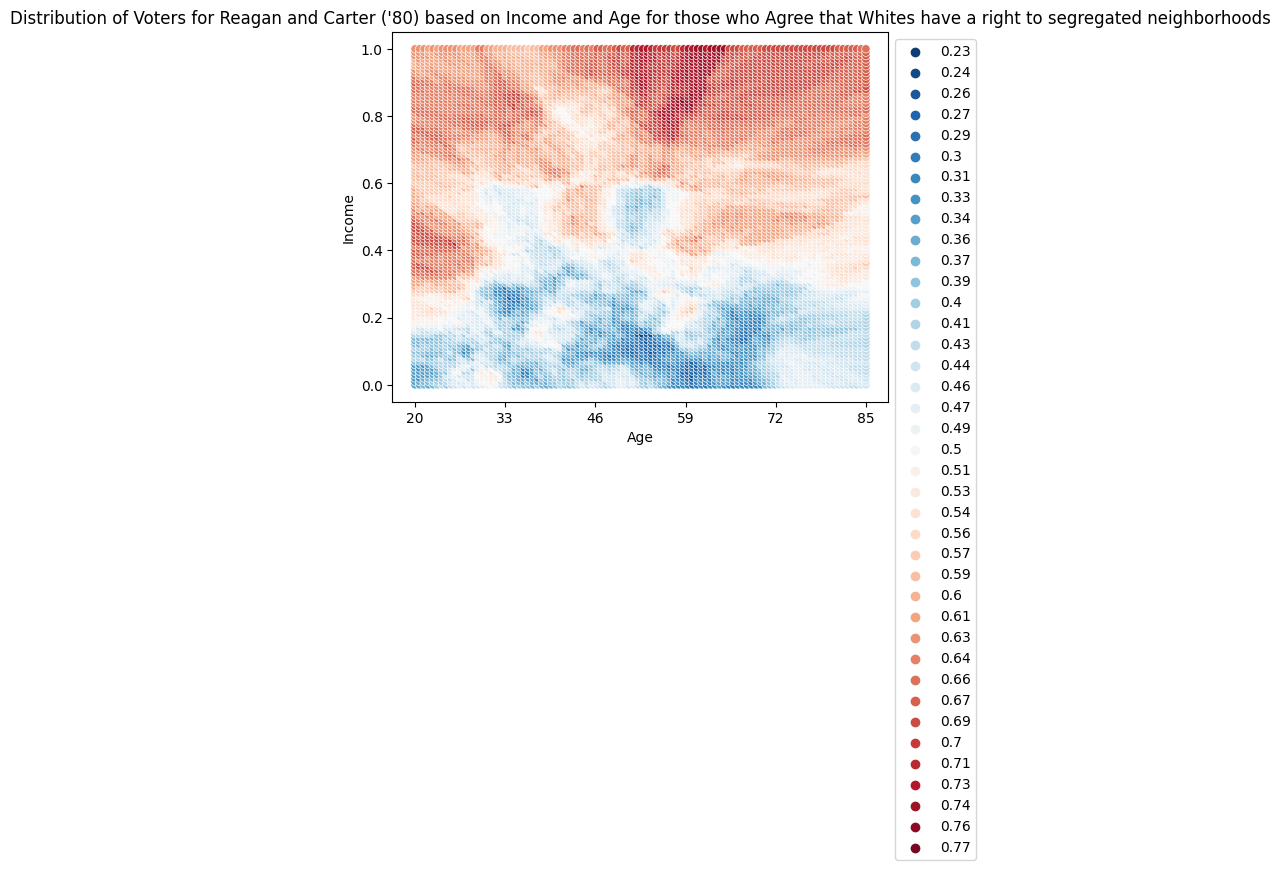

In [83]:
plot_regression(X_train, y_train, num_colors=39)
plt.title("Distribution of Voters for Reagan and Carter ('80) based on Income and Age for those who Agree that Whites have a right to segregated neighborhoods")

^^ These blue regions are interesting and worth talking about. Of people that AGREE that whites have rights to segregated neighborhoods, many high income observations are now favored for Carter, while the bottom half of the graph is nearly white and has no clear prediction.

In [84]:
# Determine k value
# Determine optimal k val for this data

k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print("K where SSE is minimized:", k_star)
print("SSE at " + str(k_star) + ':', SSE_min)

K where SSE is minimized: [63]
SSE at [63]: 146.60367850844042


Text(0, 0.5, 'SSE')

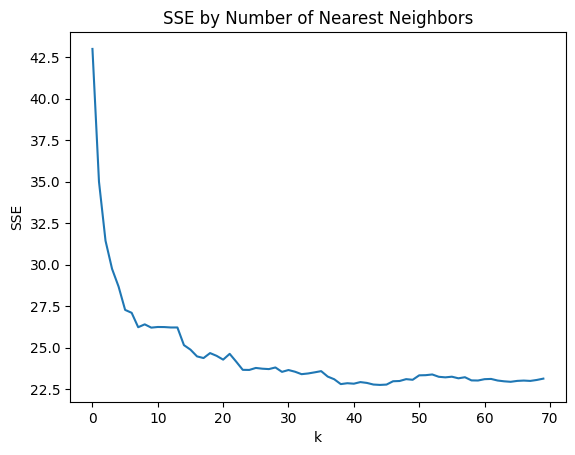

In [31]:
plt.title("SSE by Number of Nearest Neighbors")
plt.plot(np.arange(0,k_bar),SSE_test,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")

In [85]:
### kNN for those who DISAGREE ('racseg') ###
X = disagree_dat[['income', 'age']]
y = disagree_dat['pres80']

X = X.apply(maxmin)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=72)


model = kNNRegressor(n_neighbors=60)
fitted_model = model.fit(X_train, y_train)

<ipython-input-75-0f110a20b189>:23: UserWarning: The palette list has more values (33) than needed (31), which may not be intended.
  this_plot = sns.scatterplot(data=x_hat,x='age',y='income',hue='Predicted', palette= red_to_blue_palette) # Create seaborn plot


,income,age,Predicted
0,0.000000,0.0,0.383333
1,0.010101,0.0,0.350000
2,0.020202,0.0,0.366667
3,0.030303,0.0,0.333333
4,0.040404,0.0,0.350000
...,...,...,...
9995,0.959596,1.0,0.600000
9996,0.969697,1.0,0.616667
9997,0.979798,1.0,0.616667
9998,0.989899,1.0,0.616667


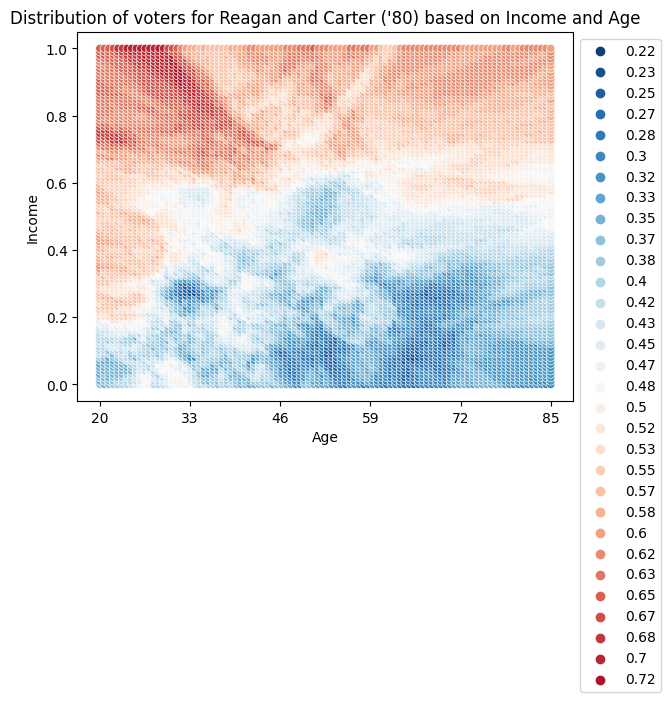

In [86]:
plot_regression(X_train, y_train, num_colors=33)

In [87]:
# Determine k value
# Determine optimal k val for this data

k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print("K where SSE is minimized:", k_star)
print("SSE at " + str(k_star) + ':', SSE_min)

K where SSE is minimized: [60]
SSE at [60]: 92.83166666666668


Text(0, 0.5, 'SSE')

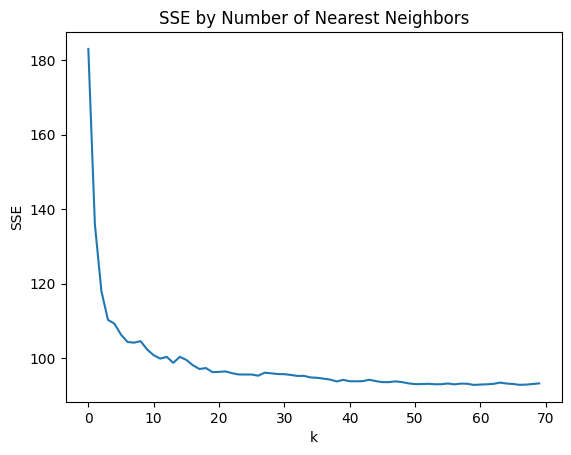

In [35]:
plt.title("SSE by Number of Nearest Neighbors")
plt.plot(np.arange(0,k_bar),SSE_test,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")

# Data cleaning and preprocessing ('84 election)

In [91]:
gss_dat84['pres84'].unique()

# Remove "didn't vote for president" and other no answer responses (see codebook), binary prediction variable
gss_dat84 = gss_dat84.loc[
    (gss_dat84['pres84'] == 'reagan') |
    (gss_dat84['pres84'] == 'mondale'), :]

print(gss_dat84['pres84'].value_counts())
print(gss_dat84['pres84'].isnull().sum())

gss_dat84['pres84'] = gss_dat84['pres84'].replace('mondale', 0).replace('reagan', 1)
print(gss_dat84['pres84'].value_counts())

# data is now filtered for years 85-89, as observations for pres84 are only in this range

reagan     1854
mondale    1225
Name: pres84, dtype: int64
0
1    1854
0    1225
Name: pres84, dtype: int64


<ipython-input-91-08ba73a78513>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_dat84['pres84'] = gss_dat84['pres84'].replace('mondale', 0).replace('reagan', 1)


<Axes: >

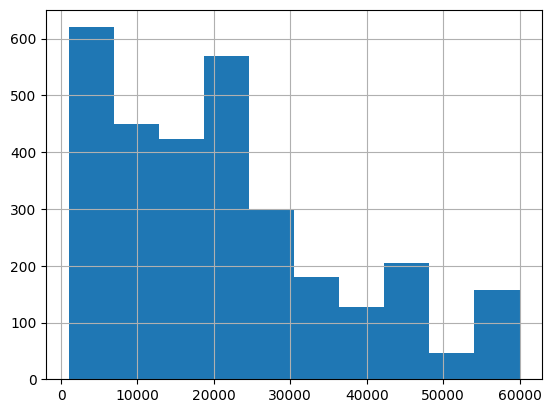

In [92]:
# rincom82
# because of the distribution of this histogram, I think it is ok to take the mean of each range as its numeric value
## $50,000 + is ok as 50000 as it is not a huge proportion of the data
#gss_dat['rincom82'].hist()

# recode all values to numeric mean of range
temp = gss_dat84['rincom82'].replace('lt $1000', 1000).replace('$1000-2999', 2000).replace('$3000-3999', 3500).replace('$4000-4999', 4500).replace('$5000-5999', 5500).replace('$6000-6999', 6500).replace('$7000-7999', 7500).replace('$8000-9999', 9000).replace('$10000-12499', 11250).replace('$12500-14999', 13750).replace('$15000-17499', 16250).replace('$17500-19999', 18750).replace('$20000-22499', 21250).replace('$22500-24999', 23750).replace('$25000-34999', 30000).replace('$35000-49999', 42500).replace('$50000 +', 50000)
temp.value_counts()
gss_dat84['rincom82'] = temp



# rincom86

# recode all values to numeric mean of range
temp = gss_dat84['rincom86'].replace('lt $1000', 1000).replace('$1000-2999', 2000).replace('$3000-3999', 3500).replace('$4000-4999', 4500).replace('$5000-5999', 5500).replace('$6000-6999', 6500).replace('$7000-7999', 7500).replace('$8000-9999', 9000).replace('$10000-12499', 11250).replace('$12500-14999', 13750).replace('$15000-17499', 16250).replace('$17500-19999', 18750).replace('$20000-22499', 21250).replace('$22500-24999', 23750).replace('$25000-29999', 27500).replace('$30000-34999', 32500).replace('$35000-39999', 37500).replace('$40000-49999', 45000).replace('$50000-59999', 55000).replace('$60000+', 60000)
temp.value_counts()
gss_dat84['rincom86'] = temp

gss_dat84 = gss_dat84.loc[(~gss_dat84['rincom82'].isnull()) |
                      (~gss_dat84['rincom86'].isnull()), ] # dropped all rows where rincom82 is a NaN or rincom86 is a NaN


# Combine data
gss_dat84['income'] = gss_dat84['rincom82'].fillna(gss_dat84['rincom86']) # make a combined column 'income' that is equal to rincom82 unless it is NaN, then equal to rincom86
gss_dat84['income'].describe()



gss_dat84['income'].unique()
gss_dat84['income'].hist()

In [93]:
pd.crosstab(gss_dat84['income'], gss_dat84['pres84'])

pres84,0,1
income,,
1000,42,62
2000,60,82
3500,58,56
4500,39,36
5500,42,46
6500,46,51
7500,42,49
9000,59,66
11250,91,143


In [38]:
# Coerce age to numeric
print(gss_dat84['age'].value_counts())
gss_dat84['age'].isnull().sum()
gss_dat84 = gss_dat84.loc[~gss_dat84['age'].isnull(), ] # keep rows where age is NOT null
gss_dat84['age'].isnull().sum()

gss_dat84['age'] = pd.to_numeric(gss_dat84['age'], errors="coerce")

28.0    103
35.0    103
30.0    102
38.0    100
34.0     99
       ... 
84.0      2
80.0      2
85.0      1
83.0      1
79.0      1
Name: age, Length: 65, dtype: int64


<ipython-input-38-23a3b4e5dfb5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gss_dat84['age'] = pd.to_numeric(gss_dat84['age'], errors="coerce")


In [39]:
gss_dat84['degree'].isnull().sum()
gss_dat84['degree'].value_counts()
gss_dat84['degree'].unique() # NaN and 'degree' present

gss_dat84 = gss_dat84.loc[(~gss_dat84['degree'].isnull()) & (gss_dat84['degree'] != 'degree'), ] # keep rows where value for degree is not NaN or 'degree' (see codebook, NaN and 'degree' respones are invalid)
gss_dat84['degree'].unique() # all observations are now "bachelor's", 'less than high school', 'high school', 'graduate', or 'associate/junior college'

array(["bachelor's", 'graduate', 'high school',
       'associate/junior college', 'less than high school'], dtype=object)

# Modeling ('84 election)

In [55]:
# Maxmin normalize data and split into training/testing sets
X = gss_dat84[['income', 'age']]
y = gss_dat84['pres84']


X = X.apply(maxmin)
print(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=74)
print("X_train data:", X_train.shape)
print("X_test data:", X_test.shape)
print("y_train data:", y_train.shape)
print("y_test data:", y_test.shape)

print(X_train.columns)
print(X_test.columns)

[21250. 50000.  1000. 11250. 13750. 16250. 42500. 30000.  6500. 18750.
  3500.  2000.  9000. 23750.  7500.  4500.  5500. 27500. 45000. 32500.
 37500. 55000. 60000.]
         income       age
17053  0.343220  0.212121
17054  0.830508  0.454545
17055  0.000000  0.060606
17056  0.173729  0.106061
17057  0.216102  0.075758
X_train data: (2460, 2)
X_test data: (615, 2)
y_train data: (2460,)
y_test data: (615,)
Index(['income', 'age'], dtype='object')
Index(['income', 'age'], dtype='object')


In [41]:
# Fit model
knn_model = kNNRegressor(n_neighbors=65)
fitted_model = knn_model.fit(X_train, y_train)

In [59]:
# Run regression model
# Regression function to predict pres vote based on 'age' and 'income'
def plot_regression2(X_train, y_train):

  N_x = 100
  N_y = 100 # Coarseness of y variable
  total = N_x*N_y # Total number of points to plot

  grid_x = np.linspace(0,1,N_x) # Create a grid of x values
  grid_y = np.linspace(0,1,N_y) # Create a grid of y values

  xs, ys = np.meshgrid(grid_x,grid_y) # Explode grids to all possible pairs
  X = xs.reshape(total) # Turns pairs into vectors
  Y = ys.reshape(total) # Turns pairs into vectors

  x_hat = pd.DataFrame({'income':X,'age':Y}) # Create a dataframe of points to plot
  y_hat = fitted_model.predict(x_hat) # Fit the model to the points
  x_hat['Predicted'] = y_hat # Add new variable to the dataframe

  # Red to blue palette to show traditional political colors
  red_to_blue_palette = sns.color_palette("RdBu_r", n_colors=36) # n_colors determined by k

  this_plot = sns.scatterplot(data=x_hat,x='age',y='income',hue='Predicted', palette= red_to_blue_palette) # Create seaborn plot

  # Round legend values to 2 decimal
  legend = plt.legend() # stackoverflow.com
  for text in legend.get_texts():
    original_label = text.get_text()
    rounded_label = str(round(float(original_label), 2))
    text.set_text(rounded_label)

  sns.move_legend(this_plot, "upper left", bbox_to_anchor=(1, 1)) # Move legend off the plot canvas
  plt.title("Distribution of voters for Reagan and Mondale ('84) based on Income and Age")
  plt.ylabel('Income')
  plt.xlabel('Age')

  plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [20, 33, 46, 59, 72, 85])
  plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [1000, 13000, 25000, 37000, 49000, 60000])

  ### to-do ###
  # convert axis ticks back to original data for understandability

  return x_hat

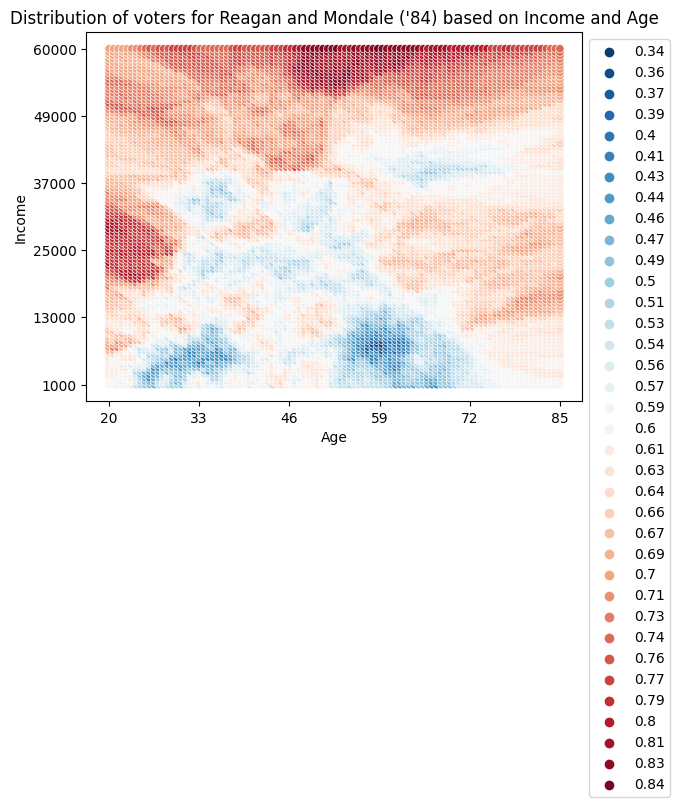

In [60]:
train_dat2 = plot_regression2(X_train, y_train)

In [44]:
# Determine k value
# Determine optimal k val for this data

k_bar = 70
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
    model = kNNRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE_test[k] = np.sum( (y_test-y_hat)**2 ) # Save the computed SSE
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_train[k] = np.sum( (y_train-y_hat)**2 ) # Save the computed SSE

SSE_min = np.min(SSE_test) # Lowest recorded SSE
min_index = np.where(SSE_test==SSE_min) # Find the indices of y that equal the minimum
k_star = k_grid[min_index] # Find the optimal value of k
print("K where SSE is minimized:", k_star)
print("SSE at " + str(k_star) + ':', SSE_min)

K where SSE is minimized: [65]
SSE at [65]: 145.58390532544377


Text(0, 0.5, 'SSE')

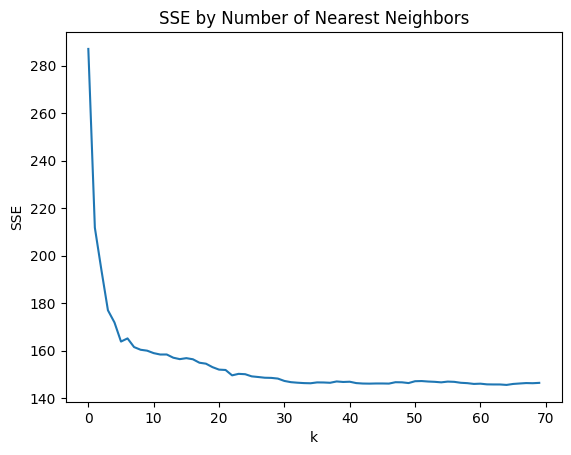

In [45]:
plt.title("SSE by Number of Nearest Neighbors")
plt.plot(np.arange(0,k_bar),SSE_test,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")

# Ignore section

In [46]:
# ignore below #

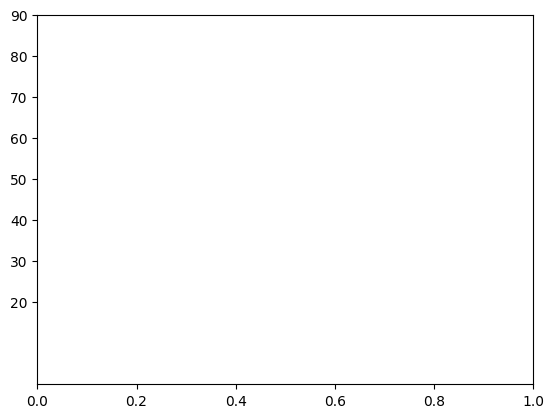

In [54]:
# Carter scatter
plot = sns.scatterplot(gss_dat.loc[gss_dat['pres80'] == 'carter'], x='income', y='age', hue='pres80')
plot.set_yticks([20, 30, 40, 50, 60, 70, 80, 90])

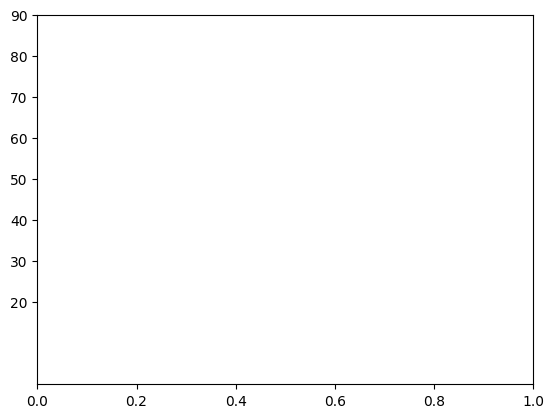

In [48]:
# Reagan scatter
plot = sns.scatterplot(gss_dat.loc[gss_dat['pres80'] == 'reagan'], x='income', y='age', hue='pres80')
plot.set_yticks([20, 30, 40, 50, 60, 70, 80, 90])

In [49]:
### to-do ideas ###
#   - K means clustering on each separate group, compare clusters
#   - look further based on sex and/or race breakdown
#

In [50]:
pd.crosstab(gss_dat['race'], gss_dat['pres80'])

pres80,0,1
race,,
black,451,18
other,33,15
white,843,1046


In [51]:
# numbers are close, no distinct splits
pd.crosstab(gss_dat['sex'], gss_dat['pres80'])

pres80,0,1
sex,,
0,716,474
1,611,605


In [52]:
### ignore below ###

In [53]:
gss_dat['abmoral'].value_counts() # clean, can remove "depends" for more specific results
gss_dat['abmoral'].isnull().sum() # so many absent values, no reason to continue with variable
gss_dat.drop('abmoral', axis=1, inplace=True) # drop column 'abmoral' on axis 1 (column)

KeyError: ignored

In [ ]:
gss_dat['madeg'].isnull().sum()
gss_dat['madeg'].unique() # NaNs present

gss_dat = gss_dat.loc[~gss_dat['madeg'].isnull(), ] # keep rows where value for madeg is not NaN
gss_dat['madeg'].unique() # NaNs present

In [ ]:
gss_dat['padeg'].isnull().sum()
gss_dat['padeg'].unique() # NaNs present

gss_dat = gss_dat.loc[~gss_dat['padeg'].isnull(), ] # keep rows where value for padeg is not NaN
gss_dat['padeg'].unique() # NaNs present

In [ ]:
gss_dat['sex'].unique() # NaN present
gss_dat = gss_dat.loc[~gss_dat['sex'].isnull(), ] # check codebook, sex == nan does not make sense in context of survey
gss_dat['sex'].unique()

In [ ]:
gss_dat['race'].value_counts().sum()
gss_dat = gss_dat.loc[~gss_dat['race'].isnull(), ] # keep rows where race is not null

gss_dat['race'].unique()
print("Proportion white:", (gss_dat['race'] == 'white').sum() / (len(gss_dat))) # output of proportions of race in data for reference/Data write up
print("Proportion black:", (gss_dat['race'] == 'black').sum() / (len(gss_dat)))
print("Proportion other than w/b:", (gss_dat['race'] == 'other').sum() / (len(gss_dat)))

gss_dat['race'].hist()

In [ ]:
gss_dat = gss_dat.loc[(~gss_dat['wrkstat'].isnull()), ] # remove NaNs
gss_dat['wrkstat'] = gss_dat['wrkstat'].replace('unemployed, laid off, looking for work', 'unemployed') # replace long string of unemployed states with 'unemployed'
(gss_dat['wrkstat'] == 'with a job, but not at work because of temporary illness, vacation, strike').sum() # relatively few entries, annoying value

gss_dat = gss_dat.loc[gss_dat['wrkstat'] != 'with a job, but not at work because of temporary illness, vacation, strike', ] # delete rows w/ this entry ^
print(gss_dat['wrkstat'].value_counts())

In [ ]:
gss_dat = gss_dat.loc[~gss_dat['wrkstat'].isnull(), ]
gss_dat['wrkgovt'].unique()

In [ ]:
# Shows that many mothers and fathers have similiar levels of education
pd.crosstab(gss_dat['madeg'], gss_dat['padeg'])